SVM = Support Vertor Machine = Метод опорных векторов

![svm0.png](attachment:svm0.png)

![svm1.png](attachment:svm1.png)

Разделяющая гиперплоскость: $w^Tx - b = 0$
    
При этом для класса "+1" $w_x - b > 0$, для класса "-1" $w^Tx - b < 0$


Ширина разделяющей полосы - проекция вектора $x_+  − x_-$ на нормаль к гиперплоскости $w$:

\begin{align} w^T(x_+  − x_-)/|w| = (w^Tx_+  − w^Tx_-)/|w| = \left((b + 1) - (b - 1)\right)/|w| = 2/|w| \rightarrow \max \end{align}

\begin{align} |w| \rightarrow \min \end{align}

\begin{align} w^Tw/2 \rightarrow \min \end{align}

Отступ $M = y(w_Tx - b)$, классификатор ошибается тогда и только тогда, когда $M<0$, объект находится на разделяющей полосе тогда и только тогда, когда $0 \le M<1$, классификатор верно классифицирует тогда и только тогда, когда $M \ge 1$

Метод опорных векторов с жестким зазором (запрещено попадание на разделяющую полосу):

\begin{aligned}  w^Tw/2 \rightarrow \min \\
y(w^Tx - b) \ge 1 \end{aligned}


Штраф за $M<0$:
\begin{aligned} Penalty = \sum_i{\max(0, 1 - M_i)} \end{aligned}

Функция потерь:
\begin{aligned} Q = \sum_i{\max(0, 1 - M_i)} + \lambda w^Tw/2 \end{aligned}

Пересчет весов:
\begin{aligned} \nabla Q &= \lambda w - yx,\space при \space yw^Tx  < 1 \\
\nabla Q &=  \lambda w,\space при \space yw^Tx \ge 1\end{aligned}


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
X = np.array([39, 36, 60, 21, 27, 12, 51, 57, 54, 42, 18, 9, 48, 66, 6, 30, 24, 33, 15, 21]).reshape(20,1)
Y = np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]).reshape(20,1)

epoch 0. Errors=11. Mean Hinge_loss=[10.0065889]
epoch 1. Errors=10. Mean Hinge_loss=[10.006581]
epoch 2. Errors=10. Mean Hinge_loss=[10.0065731]
epoch 3. Errors=10. Mean Hinge_loss=[10.00656522]
epoch 4. Errors=10. Mean Hinge_loss=[10.00655735]
epoch 5. Errors=10. Mean Hinge_loss=[10.00654948]
epoch 6. Errors=10. Mean Hinge_loss=[10.00654163]
epoch 7. Errors=10. Mean Hinge_loss=[10.00653378]
epoch 8. Errors=10. Mean Hinge_loss=[10.00652595]
epoch 9. Errors=10. Mean Hinge_loss=[10.00651812]
epoch 10. Errors=10. Mean Hinge_loss=[10.0065103]
epoch 11. Errors=10. Mean Hinge_loss=[10.0065025]
epoch 12. Errors=10. Mean Hinge_loss=[10.0064947]
epoch 13. Errors=10. Mean Hinge_loss=[10.00648691]
epoch 14. Errors=10. Mean Hinge_loss=[10.00647913]
epoch 15. Errors=10. Mean Hinge_loss=[10.00647136]
epoch 16. Errors=10. Mean Hinge_loss=[10.0064636]
epoch 17. Errors=10. Mean Hinge_loss=[10.00645584]
epoch 18. Errors=10. Mean Hinge_loss=[10.0064481]
epoch 19. Errors=10. Mean Hinge_loss=[10.00644037]

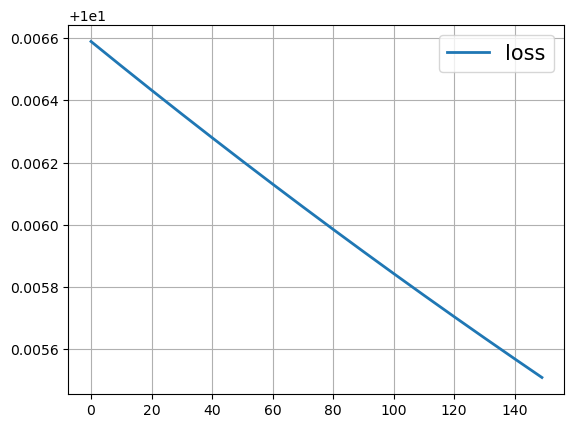

In [4]:
svm = SVMClassification(learning_rate=0.005, lam=0.006, max_iter=150)
svm.fit(X, Y, verbose = True)

print(svm.errors)
print(svm.w)

plt.plot(svm.loss, linewidth=2, label='loss')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

In [5]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris = load_iris()
X = iris.data
Y = iris.target
pca = PCA(n_components = 2)
X = pca.fit_transform(X)
Y[Y == 0] = -1
Y[Y > 0] = 1


epoch 0. Errors=88. Mean Hinge_loss=49.915136272235614
epoch 1. Errors=46. Mean Hinge_loss=19.765209030238616
epoch 2. Errors=32. Mean Hinge_loss=11.075160124732614
epoch 3. Errors=22. Mean Hinge_loss=7.0914545204183845
epoch 4. Errors=15. Mean Hinge_loss=4.793550871708209
epoch 5. Errors=14. Mean Hinge_loss=3.7964198168084926
epoch 6. Errors=12. Mean Hinge_loss=3.465708287290666
epoch 7. Errors=10. Mean Hinge_loss=3.2523431380778005
epoch 8. Errors=10. Mean Hinge_loss=3.102178888620643
epoch 9. Errors=10. Mean Hinge_loss=2.972833299010607
epoch 10. Errors=8. Mean Hinge_loss=2.8508968695939036
epoch 11. Errors=7. Mean Hinge_loss=2.801924348074088
epoch 12. Errors=7. Mean Hinge_loss=2.773347328206947
epoch 13. Errors=7. Mean Hinge_loss=2.745445917182288
epoch 14. Errors=7. Mean Hinge_loss=2.7181858846766853
epoch 15. Errors=6. Mean Hinge_loss=2.6395117929780794
epoch 16. Errors=7. Mean Hinge_loss=2.609175866927323
epoch 17. Errors=7. Mean Hinge_loss=2.5808946367872783
epoch 18. Errors=7

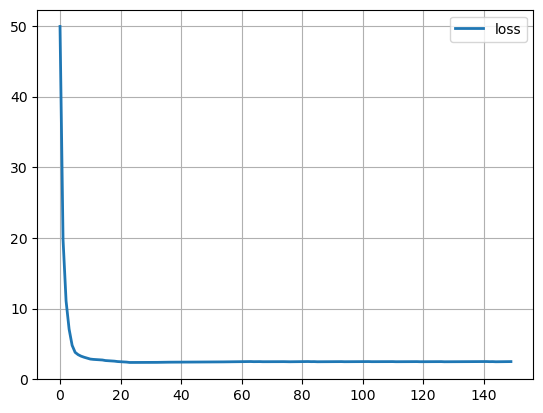

In [6]:
np.random.seed(123)
svm = SVMClassification(learning_rate = 0.005, lam = 0.006, max_iter = 150)
svm.fit(X, Y, verbose = True)
print(svm.errors)
print(svm.w)
plt.plot(svm.loss, linewidth = 2, label = 'loss')
plt.grid()
plt.legend()
plt.show()

Реализовать классификацию методом svm для набора данных  German Credit Cards UCI.csv

In [5]:
df = pd.read_csv('German Credit Cards UCI.csv')
df.head()

,Customer ID,Checking Account Status,Loan Duration (Months),Credit History,Purpose,Loan Amount,Savings Account Balance,Present Employment Time (Years),Installment Rate in Percentage of Disposable Income,Personal Status and Gender,...,Property,Age (Years),Other Credits,Home Ownership,Number of Existing Credits at This Bank,Job Category,Number of Dependents,Telephone,Foreign Worker Status,Loan Status
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,fully paid
1,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,...,real estate,22,none,own,1,skilled,1,none,yes,charged off
2,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,fully paid
3,8740590,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,fully paid
4,3924540,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,...,unknown-none,53,none,for free,2,skilled,2,none,yes,charged off


In [6]:
df = df.drop('Customer ID', axis = 1)

In [7]:
df.dtypes

Checking Account Status                                object
Loan Duration (Months)                                  int64
Credit History                                         object
Purpose                                                object
Loan Amount                                             int64
Savings Account Balance                                object
Present Employment Time (Years)                        object
Installment Rate in Percentage of Disposable Income     int64
Personal Status and Gender                             object
Other Debtors / Guarantors                             object
Present Residence Time (Years)                          int64
Property                                               object
Age (Years)                                             int64
Other Credits                                          object
Home Ownership                                         object
Number of Existing Credits at This Bank                 int64
Job Cate

In [8]:
df.isna().sum()

Checking Account Status                                0
Loan Duration (Months)                                 0
Credit History                                         0
Purpose                                                0
Loan Amount                                            0
Savings Account Balance                                0
Present Employment Time (Years)                        0
Installment Rate in Percentage of Disposable Income    0
Personal Status and Gender                             0
Other Debtors / Guarantors                             0
Present Residence Time (Years)                         0
Property                                               0
Age (Years)                                            0
Other Credits                                          0
Home Ownership                                         0
Number of Existing Credits at This Bank                0
Job Category                                           0
Number of Dependents           

In [9]:
df[df.duplicated()].shape[0]

14

In [10]:
df = df.drop_duplicates()
df = df.reset_index(drop = True)
df.head(2)

,Checking Account Status,Loan Duration (Months),Credit History,Purpose,Loan Amount,Savings Account Balance,Present Employment Time (Years),Installment Rate in Percentage of Disposable Income,Personal Status and Gender,Other Debtors / Guarantors,...,Property,Age (Years),Other Credits,Home Ownership,Number of Existing Credits at This Bank,Job Category,Number of Dependents,Telephone,Foreign Worker Status,Loan Status
0,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,fully paid
1,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,none,...,real estate,22,none,own,1,skilled,1,none,yes,charged off


In [15]:
df['Loan Status'].unique()

array(['fully paid', 'charged off'], dtype=object)

(array([700.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

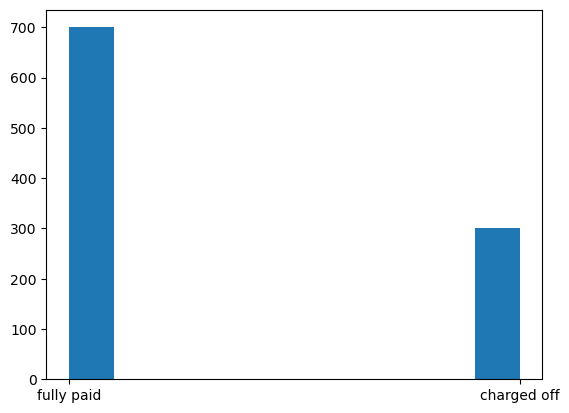

In [16]:
plt.hist(df['Loan Status'])

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Loan Status'] = labelencoder.fit_transform(df['Loan Status'].values)

In [12]:
Y = np.array(df['Loan Status'])
#Y

In [13]:
df = df.drop('Loan Status',axis = 1)

In [14]:
df_num = df.select_dtypes(exclude = 'object')
df_num

,Loan Duration (Months),Loan Amount,Installment Rate in Percentage of Disposable Income,Present Residence Time (Years),Age (Years),Number of Existing Credits at This Bank,Number of Dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1
997,12,804,4,4,38,1,1
998,45,1845,4,4,23,1,1


<Axes: >

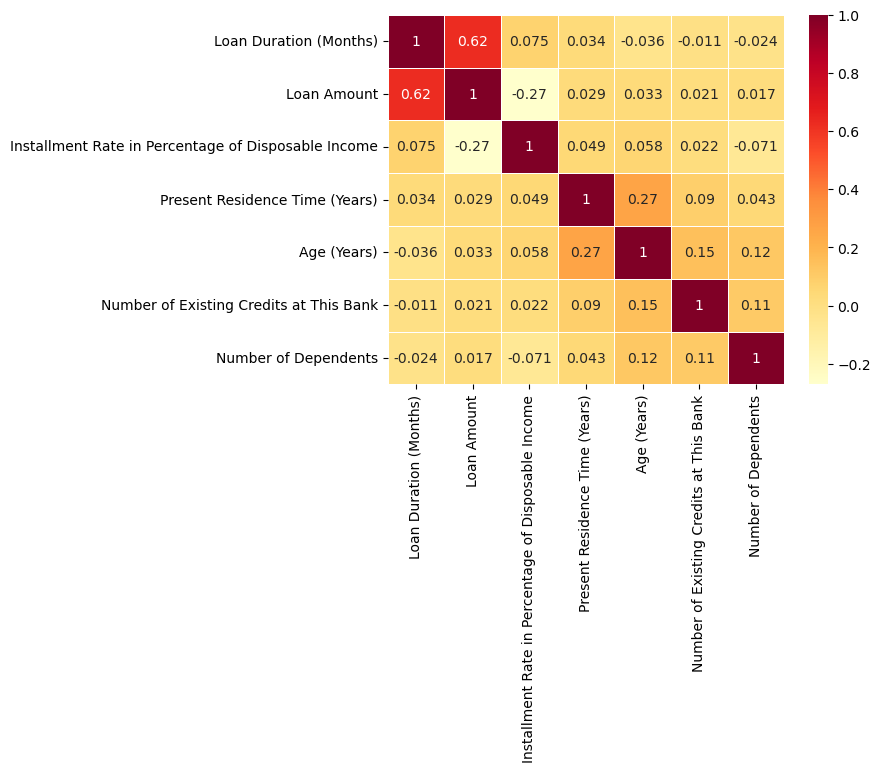

In [22]:
sns.heatmap(df_num.corr() , annot=True, cmap='YlOrRd', linewidths=0.5)

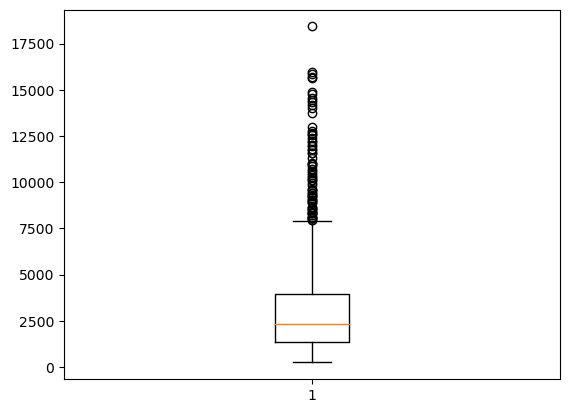

In [23]:
plt.boxplot(df['Loan Amount'])
plt.show()

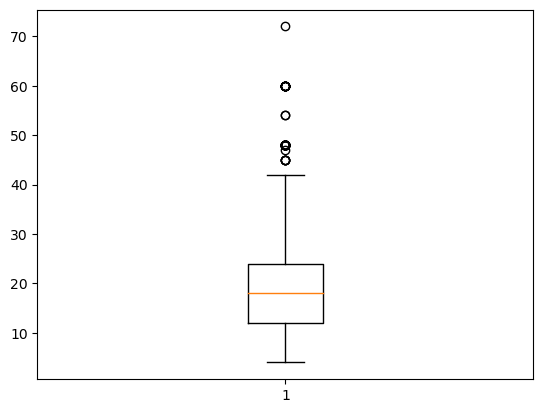

In [24]:
plt.boxplot(df['Loan Duration (Months)'])
plt.show()

In [15]:
def replace_outliers_with_median_for_column(df, column_name, threshold=1.5):
    data = df[column_name]
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    lower_bound = q25 - (threshold * iqr)
    upper_bound = q75 + (threshold * iqr)
    median = np.median(data)
    
    data_without_outliers = np.where((data < lower_bound) | (data > upper_bound), median, data)
    
    df[column_name] = data_without_outliers
    
    return df

In [16]:
replace_outliers_with_median_for_column(df, 'Loan Amount')
replace_outliers_with_median_for_column(df, 'Loan Duration (Months)')

,Checking Account Status,Loan Duration (Months),Credit History,Purpose,Loan Amount,Savings Account Balance,Present Employment Time (Years),Installment Rate in Percentage of Disposable Income,Personal Status and Gender,Other Debtors / Guarantors,Present Residence Time (Years),Property,Age (Years),Other Credits,Home Ownership,Number of Existing Credits at This Bank,Job Category,Number of Dependents,Telephone,Foreign Worker Status
0,< 0 DM,6.0,critical account - other non-bank loans,radio/television,1169.0,unknown/none,>= 7 years,4,male-single,none,4,real estate,67,none,own,2,skilled,1,yes,yes
1,0 - 200 DM,18.0,current loans paid,radio/television,5951.0,< 100 DM,1 - 4 years,2,female-divorced/separated/married,none,2,real estate,22,none,own,1,skilled,1,none,yes
2,none,12.0,critical account - other non-bank loans,education,2096.0,< 100 DM,4 - 7 years,2,male-single,none,3,real estate,49,none,own,1,unskilled-resident,2,none,yes
3,< 0 DM,42.0,current loans paid,furniture/equipment,7882.0,< 100 DM,4 - 7 years,2,male-single,guarantor,4,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes
4,< 0 DM,24.0,past payment delays,car (new),4870.0,< 100 DM,1 - 4 years,3,male-single,none,4,unknown-none,53,none,for free,2,skilled,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,none,12.0,current loans paid,furniture/equipment,1736.0,< 100 DM,4 - 7 years,3,female-divorced/separated/married,none,4,real estate,31,none,own,1,unskilled-resident,1,none,yes
996,< 0 DM,30.0,current loans paid,car (used),3857.0,< 100 DM,1 - 4 years,4,male-divorced/separated,none,4,building society savings/life insurance,40,none,own,1,highly skilled,1,yes,yes
997,none,12.0,current loans paid,radio/television,804.0,< 100 DM,>= 7 years,4,male-single,none,4,car or other,38,none,own,1,skilled,1,none,yes
998,< 0 DM,18.0,current loans paid,radio/television,1845.0,< 100 DM,1 - 4 years,4,male-single,none,4,unknown-none,23,none,for free,1,skilled,1,yes,yes


In [17]:
df_obj = df.select_dtypes(include = 'object')
df_obj.head(2)

,Checking Account Status,Credit History,Purpose,Savings Account Balance,Present Employment Time (Years),Personal Status and Gender,Other Debtors / Guarantors,Property,Other Credits,Home Ownership,Job Category,Telephone,Foreign Worker Status
0,< 0 DM,critical account - other non-bank loans,radio/television,unknown/none,>= 7 years,male-single,none,real estate,none,own,skilled,yes,yes
1,0 - 200 DM,current loans paid,radio/television,< 100 DM,1 - 4 years,female-divorced/separated/married,none,real estate,none,own,skilled,none,yes


In [18]:
df['Credit History'] = labelencoder.fit_transform(df['Credit History'].values)
df['Job Category'] = labelencoder.fit_transform(df['Job Category'].values)

In [19]:
df_obj = df_obj.drop(['Credit History','Job Category'], axis = 1)

In [30]:
# Предположим, что df - это ваш DataFrame

# Создаем экземпляр LabelEncoder
label_encoder = LabelEncoder()

# Проходим по всем столбцам в DataFrame
for column in df.columns:
    if df[column].dtype == 'object':
        # Кодируем категориальные признаки
        df[column] = label_encoder.fit_transform(df[column])
df

,Checking Account Status,Loan Duration (Months),Credit History,Purpose,Loan Amount,Savings Account Balance,Present Employment Time (Years),Installment Rate in Percentage of Disposable Income,Personal Status and Gender,Other Debtors / Guarantors,Present Residence Time (Years),Property,Age (Years),Other Credits,Home Ownership,Number of Existing Credits at This Bank,Job Category,Number of Dependents,Telephone,Foreign Worker Status
0,1,6.0,1,7,1169.0,4,3,4,3,2,4,2,67,1,1,2,1,1,1,1
1,0,18.0,2,7,5951.0,2,0,2,0,2,2,2,22,1,1,1,1,1,0,1
2,3,12.0,1,4,2096.0,2,1,2,3,2,3,2,49,1,1,1,3,2,0,1
3,1,42.0,2,5,7882.0,2,1,2,3,1,4,0,45,1,0,1,1,2,0,1
4,1,24.0,4,1,4870.0,2,0,3,3,2,4,3,53,1,0,2,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12.0,2,5,1736.0,2,1,3,0,2,4,2,31,1,1,1,3,1,0,1
996,1,30.0,2,2,3857.0,2,0,4,1,2,4,0,40,1,1,1,0,1,1,1
997,3,12.0,2,7,804.0,2,3,4,3,2,4,1,38,1,1,1,1,1,0,1
998,1,18.0,2,7,1845.0,2,0,4,3,2,4,3,23,1,0,1,1,1,1,1


In [20]:
df = pd.get_dummies(df, prefix= df_obj.columns, dtype="float64")
df

,Loan Duration (Months),Credit History,Loan Amount,Installment Rate in Percentage of Disposable Income,Present Residence Time (Years),Age (Years),Number of Existing Credits at This Bank,Job Category,Number of Dependents,Checking Account Status_0 - 200 DM,...,Other Credits_bank,Other Credits_none,Other Credits_stores,Home Ownership_for free,Home Ownership_own,Home Ownership_rent,Telephone_none,Telephone_yes,Foreign Worker Status_no,Foreign Worker Status_yes
0,6.0,1,1169.0,4,4,67,2,1,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,18.0,2,5951.0,2,2,22,1,1,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,12.0,1,2096.0,2,3,49,1,3,2,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,42.0,2,7882.0,2,4,45,1,1,2,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,24.0,4,4870.0,3,4,53,2,1,2,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,2,1736.0,3,4,31,1,3,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
996,30.0,2,3857.0,4,4,40,1,0,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
997,12.0,2,804.0,4,4,38,1,1,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
998,18.0,2,1845.0,4,4,23,1,1,1,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [21]:
def standardize_dataframe(df):
    scaler = StandardScaler()
    df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_standardized
df = standardize_dataframe(df)
df

,Loan Duration (Months),Credit History,Loan Amount,Installment Rate in Percentage of Disposable Income,Present Residence Time (Years),Age (Years),Number of Existing Credits at This Bank,Job Category,Number of Dependents,Checking Account Status_0 - 200 DM,...,Other Credits_bank,Other Credits_none,Other Credits_stores,Home Ownership_for free,Home Ownership_own,Home Ownership_rent,Telephone_none,Telephone_yes,Foreign Worker Status_no,Foreign Worker Status_yes
0,-1.437321,-0.894641,-0.858779,0.918477,1.046987,2.766456,1.027079,-0.289639,-0.428290,-0.606621,...,-0.401796,0.478018,-0.222076,-0.347960,0.634448,-0.466933,-1.214598,1.214598,-0.196014,0.196014
1,-0.071371,0.189772,1.913058,-0.870183,-0.765977,-1.191404,-0.704926,-0.289639,-0.428290,1.648476,...,-0.401796,0.478018,-0.222076,-0.347960,0.634448,-0.466933,0.823318,-0.823318,-0.196014,0.196014
2,-0.754346,-0.894641,-0.321453,-0.870183,0.140505,1.183312,-0.704926,1.824516,2.334869,-0.606621,...,-0.401796,0.478018,-0.222076,-0.347960,0.634448,-0.466933,0.823318,-0.823318,-0.196014,0.196014
3,2.660529,0.189772,3.032342,-0.870183,1.046987,0.831502,-0.704926,-0.289639,2.334869,-0.606621,...,-0.401796,0.478018,-0.222076,2.873893,-1.576173,-0.466933,0.823318,-0.823318,-0.196014,0.196014
4,0.611604,2.358599,1.286467,0.024147,1.046987,1.535122,1.027079,-0.289639,2.334869,-0.606621,...,-0.401796,0.478018,-0.222076,2.873893,-1.576173,-0.466933,0.823318,-0.823318,-0.196014,0.196014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.754346,0.189772,-0.530123,0.024147,1.046987,-0.399832,-0.704926,1.824516,-0.428290,-0.606621,...,-0.401796,0.478018,-0.222076,-0.347960,0.634448,-0.466933,0.823318,-0.823318,-0.196014,0.196014
996,1.294579,0.189772,0.699292,0.918477,1.046987,0.391740,-0.704926,-1.346717,-0.428290,-0.606621,...,-0.401796,0.478018,-0.222076,-0.347960,0.634448,-0.466933,-1.214598,1.214598,-0.196014,0.196014
997,-0.754346,0.189772,-1.070348,0.918477,1.046987,0.215835,-0.704926,-0.289639,-0.428290,-0.606621,...,-0.401796,0.478018,-0.222076,-0.347960,0.634448,-0.466933,0.823318,-0.823318,-0.196014,0.196014
998,-0.071371,0.189772,-0.466943,0.918477,1.046987,-1.103451,-0.704926,-0.289639,-0.428290,-0.606621,...,-0.401796,0.478018,-0.222076,2.873893,-1.576173,-0.466933,-1.214598,1.214598,-0.196014,0.196014


In [22]:
X = np.array(df)
X

array([[-1.43732104, -0.89464081, -0.85877916, ...,  1.21459768,
        -0.19601428,  0.19601428],
       [-0.0713709 ,  0.18977229,  1.91305805, ..., -0.82331789,
        -0.19601428,  0.19601428],
       [-0.75434597, -0.89464081, -0.32145313, ..., -0.82331789,
        -0.19601428,  0.19601428],
       ...,
       [-0.75434597,  0.18977229, -1.07034766, ..., -0.82331789,
        -0.19601428,  0.19601428],
       [-0.0713709 ,  0.18977229, -0.4669427 , ...,  1.21459768,
        -0.19601428,  0.19601428],
       [-0.0713709 , -0.89464081,  1.11605342, ..., -0.82331789,
        -0.19601428,  0.19601428]])

In [2]:
def add_intercept(a):
    a_ext = np.zeros((a.shape[0], a.shape[1]+1))
    a_ext[:, 0] = int(1)
    a_ext[:, 1:] = a
    return a_ext

class SVMClassification(object):
    def __init__(self, learning_rate = 0.01, lam = 0.1, max_iter = 200):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.lam = lam
        self.w = None
        self.history_w = []
        self.errors = None
        self.loss = None
    def predict(self, X:np.array) -> np.array:
        x_ext = add_intercept(X)
        return np.sign(self.w @ x_ext.T)


    def hinge_loss(self, x, y):
        return max(0, 1 - y*(x@self.w))

    def soft_margin_loss(self, x, y):
        return self.hinge_loss(x, y) + self.lam*(self.w @ self.w)

    def fit(self, X, Y, verbose = False):
        X = add_intercept(X)
        self.w = np.random.normal(loc=0, scale=0.05, size=X.shape[1])
        self.history_w.append(self.w)
        errors = []
        loss_epoch = []

        for epoch in range(self.max_iter):
            err = 0
            loss = 0
            for i, x in enumerate(X):
                margin = Y[i]*(self.w @ X[i])
                if margin >= 1: # классифицируем верно
                    self.w -= self.learning_rate*self.lam*self.w
                    loss += self.soft_margin_loss(X[i],Y[i])
                else: # классифицируем неверно или попадаем на полосу разделения при 0<m<1
                    self.w += self.learning_rate*(Y[i]*X[i] - self.lam*self.w)
                    err += 1
                    loss += self.soft_margin_loss(X[i],Y[i])
                self.history_w.append(self.w)
            if verbose:
                print('epoch {}. Errors={}. Mean Hinge_loss={}'.format(epoch,err,loss))
            errors.append(err)
            loss_epoch.append(loss)
        self.history_w = np.array(self.history_w)
        self.errors = np.array(errors)
        self.loss = np.array(loss_epoch)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 54), (200, 54), (800,), (200,))

epoch 0. Errors=510. Mean Hinge_loss=341.1040352319158
epoch 1. Errors=246. Mean Hinge_loss=244.654153843701
epoch 2. Errors=238. Mean Hinge_loss=244.53608918467046
epoch 3. Errors=237. Mean Hinge_loss=244.19140485619727
epoch 4. Errors=238. Mean Hinge_loss=243.87916209435758
epoch 5. Errors=239. Mean Hinge_loss=243.62751995149344
epoch 6. Errors=240. Mean Hinge_loss=243.43204204615165
epoch 7. Errors=241. Mean Hinge_loss=243.3761536642498
epoch 8. Errors=241. Mean Hinge_loss=243.25584293784055
epoch 9. Errors=244. Mean Hinge_loss=243.27124526453298
epoch 10. Errors=238. Mean Hinge_loss=243.17180844925355
epoch 11. Errors=240. Mean Hinge_loss=242.9515912749879
epoch 12. Errors=246. Mean Hinge_loss=243.06607117542563
epoch 13. Errors=243. Mean Hinge_loss=243.111564859551
epoch 14. Errors=237. Mean Hinge_loss=242.99904031308648
epoch 15. Errors=247. Mean Hinge_loss=242.8066604979181
epoch 16. Errors=246. Mean Hinge_loss=243.2547777197811
epoch 17. Errors=239. Mean Hinge_loss=243.25835376

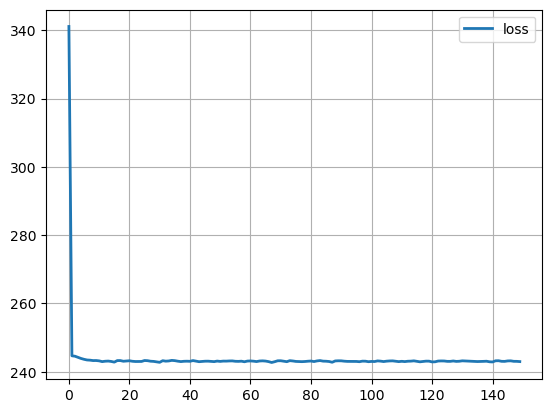

In [31]:
svm = SVMClassification(learning_rate = 0.005, lam = 0.006, max_iter = 150)
svm.fit(X_train, y_train, verbose = True)
print(svm.errors)
print(svm.w)
plt.plot(svm.loss, linewidth = 2, label = 'loss')
plt.grid()
plt.legend()
plt.show()

In [36]:
y_pred = svm.predict(X_test)

In [33]:
accuracy = np.mean(y_pred == y_test)
accuracy

0.685

In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0  63]
 [  0 137]]


In [37]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
f1

0.8130563798219584

# Смотрим, как классифицирует sklearn

In [25]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = clf.predict(X_test)

# Расчёт точности на тренировочной и тестовой выборках
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")

# Построение матрицы путаницы на тестовой выборке
cm = confusion_matrix(y_test, y_pred)
print(cm)

Train accuracy: 0.88
Test accuracy: 0.74
[[ 23  40]
 [ 12 125]]


# PCA

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
ds_pca = pca.fit_transform(df)
ds_pca = pd.DataFrame(ds_pca)
ds_pca.columns = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']
ds_pca

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,1.530216,0.248203,2.633173,-1.378638,-0.521058,2.115691,-0.453576,-1.659046,-1.744572,1.286574
1,-2.210057,-0.860369,-1.163849,0.373977,-0.359164,1.015526,0.398958,1.639504,-0.059620,-0.611720
2,-0.709817,0.823281,2.115531,-1.388067,-1.255461,-0.237467,-0.888221,0.264772,0.966767,0.505976
3,1.365361,3.785620,-0.968978,2.980637,1.303190,1.279001,-2.187904,-0.164430,4.029803,1.103289
4,2.636619,3.445002,-0.252176,-0.750257,-0.925506,-0.345342,-1.930332,2.972933,0.724681,-0.799320
...,...,...,...,...,...,...,...,...,...,...
995,-2.278090,-0.244722,-0.341813,-1.299058,-0.706142,0.311780,-0.670832,-1.188958,0.681814,0.343185
996,1.425685,-0.907854,-1.414664,0.853031,1.502707,0.095916,-2.442352,-0.077879,-0.777720,-0.197375
997,-0.027927,-0.939542,1.684270,-0.926095,-1.521703,1.539225,-1.016116,-0.615363,0.469186,-0.336158
998,2.359609,1.701700,-1.255398,-0.231947,-0.941008,1.721341,-1.239636,1.437791,-0.649780,-2.132360


In [28]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
prop_var, np.sum(prop_var)

(array([0.07058228, 0.05112969, 0.04838103, 0.04207676, 0.03749798,
        0.03512042, 0.03469628, 0.03196795, 0.03100682, 0.02861878]),
 0.41107798041901655)